In [145]:
import glob 
from pathlib import Path
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [147]:
PATH = Path(r'/Users/peaceforlives/Documents/Projects/covid_tweets/results/finalselection/')
PLOTS = Path.joinpath(PATH, 'plots')
data = pd.read_pickle(Path.joinpath(PATH,'data_predicted.pkl'))
data_docs = pd.read_pickle(Path.joinpath(PATH,'full_data.pkl'))

In [148]:
df = data.copy()
df.loc[df['bullying_trace']=='no', 'bullying_trace'] = 'NA'
df.set_index(pd.to_datetime(df['created_at']), inplace=True)
df.drop('created_at', inplace=True, axis=1)
df.tail()

,id,source,geo,coordinates,place,lang,full_tweet,timezone,localtime,state,bullying_trace,bullying_role,form_of_bullying,bullying_post_type
created_at,,,,,,,,,,,,,,
2020-04-01 03:43:12+00:00,1245194981746278400,"<a href=""https://www.socialjukebox.com"" rel=""n...",None,None,None,en,the outbreak of #coronavirus is no excuse for ...,None,None,None,yes,reporter,xenophobia,report
2020-04-01 03:46:51+00:00,1245195899120136192,"<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,en,"we welcomed mr. xi with open arms &amp; mind, ...",None,None,None,NA,NaN,NaN,NaN
2020-04-01 03:51:42+00:00,1245197120434507776,"<a href=""http://twitter.com/download/android"" ...",None,None,None,en,question of the day: if i'm making hentai fan-...,None,None,None,yes,reporter,general,report
2020-04-01 03:53:22+00:00,1245197536622792704,"<a href=""http://twitter.com/download/android"" ...",None,None,None,en,last week they were being clapped \nnow it's b...,None,None,None,yes,reporter,general,report
2020-04-01 03:58:20+00:00,1245198788899168256,"<a href=""http://twitter.com/download/iphone"" r...",None,None,None,en,area dipshit tries to bully virus,None,None,None,NA,NaN,NaN,NaN


In [149]:
def process_string(pandas_column):
    
    raw_string = ''.join(pandas_column)
    no_user = re.sub(r'@[^\s]+', 'atuser', raw_string)
    no_hastag = re.sub(r'#([^\s]+)', r'\1', no_user)
    no_links = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', 'URL', no_hastag)
    no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
    no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
    words = no_special_characters.split(" ")
    words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
    words = [w.lower() for w in words]
    words = [w for w in words if w not in STOPWORDS]
    remove = ['url','atuser', 'people', 'viru', 'virus', 'bully', 'bullying', 'bullied', 'covid', 'covid-19', 'covid19', 'corona', 'coronavirus', 'corona virus', ]
    words = [w for w in words if w not in remove]
    cleaned = ','.join(words)
    
    return cleaned

bullying_role
   accuser 1975
   defender 463
   other 13
   reporter 4318
   victim 205
form_of_bullying
   cyber 36
   general 3450
   xenophobia 3488
bullying_post_type
   accusation 2981
   cyberbullying 12
   denial 6
   report 3728
   self-disclosure 247


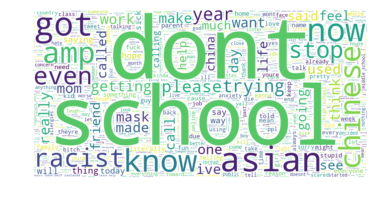

In [243]:
targets = ['bullying_role', 'form_of_bullying', 'bullying_post_type']
targets_freq = {}
for target in targets:
    print(target)
    groups = df.groupby(target)
    
    freq = {}
    for i in groups.groups:
        new_df = groups.get_group(i)
        print('   '+i, new_df.shape[0])

        clean_string = process_string(new_df['full_tweet'])
        wc = WordCloud(background_color="white", max_words=2000, max_font_size=256,
                       random_state=42, width=1000, height=500, collocations=True)
        wc.generate(clean_string)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis('off')
        plt.savefig(Path.joinpath(PLOTS,target+'_'+i+'.pdf'))

In [152]:
targets = ['bullying_role', 'form_of_bullying', 'bullying_post_type']
targets_freq = {}
for target in targets:
    print(target)
    groups = df.groupby(target)
    
    freq = {}
    for i in groups.groups:
        new_df = groups.get_group(i)
        print('   ', i, new_df.shape[0])

        clean_string = process_string(new_df['full_tweet'])
        wc = WordCloud(background_color="white", max_words=2000, max_font_size=256,
                       random_state=42, width=1000, height=500, collocations=True)
        wc.generate(clean_string)
    #     plt.imshow(wc, interpolation="bilinear")
    #     plt.axis('off')
    #     plt.show()
        D = wc.process_text(clean_string)

        word_freq = {k: v for k, v in sorted(D.items(),reverse=True, key=lambda item: item[1])}
        word_freq = list(word_freq.items())
        relative_freq = wc.words_
        relative_freq = list(relative_freq.items())
        freq[i] = (word_freq, relative_freq)
    targets_freq[target] = freq


bullying_role
    accuser 1975
    defender 463
    other 13
    reporter 4318
    victim 205
form_of_bullying
    cyber 36
    general 3450
    xenophobia 3488
bullying_post_type
    accusation 2981
    cyberbullying 12
    denial 6
    report 3728
    self-disclosure 247


bullying_role
     accuser
     defender
     other
     reporter
     victim
form_of_bullying
     cyber
     general
     xenophobia
bullying_post_type
     accusation
     cyberbullying
     denial
     report
     self-disclosure


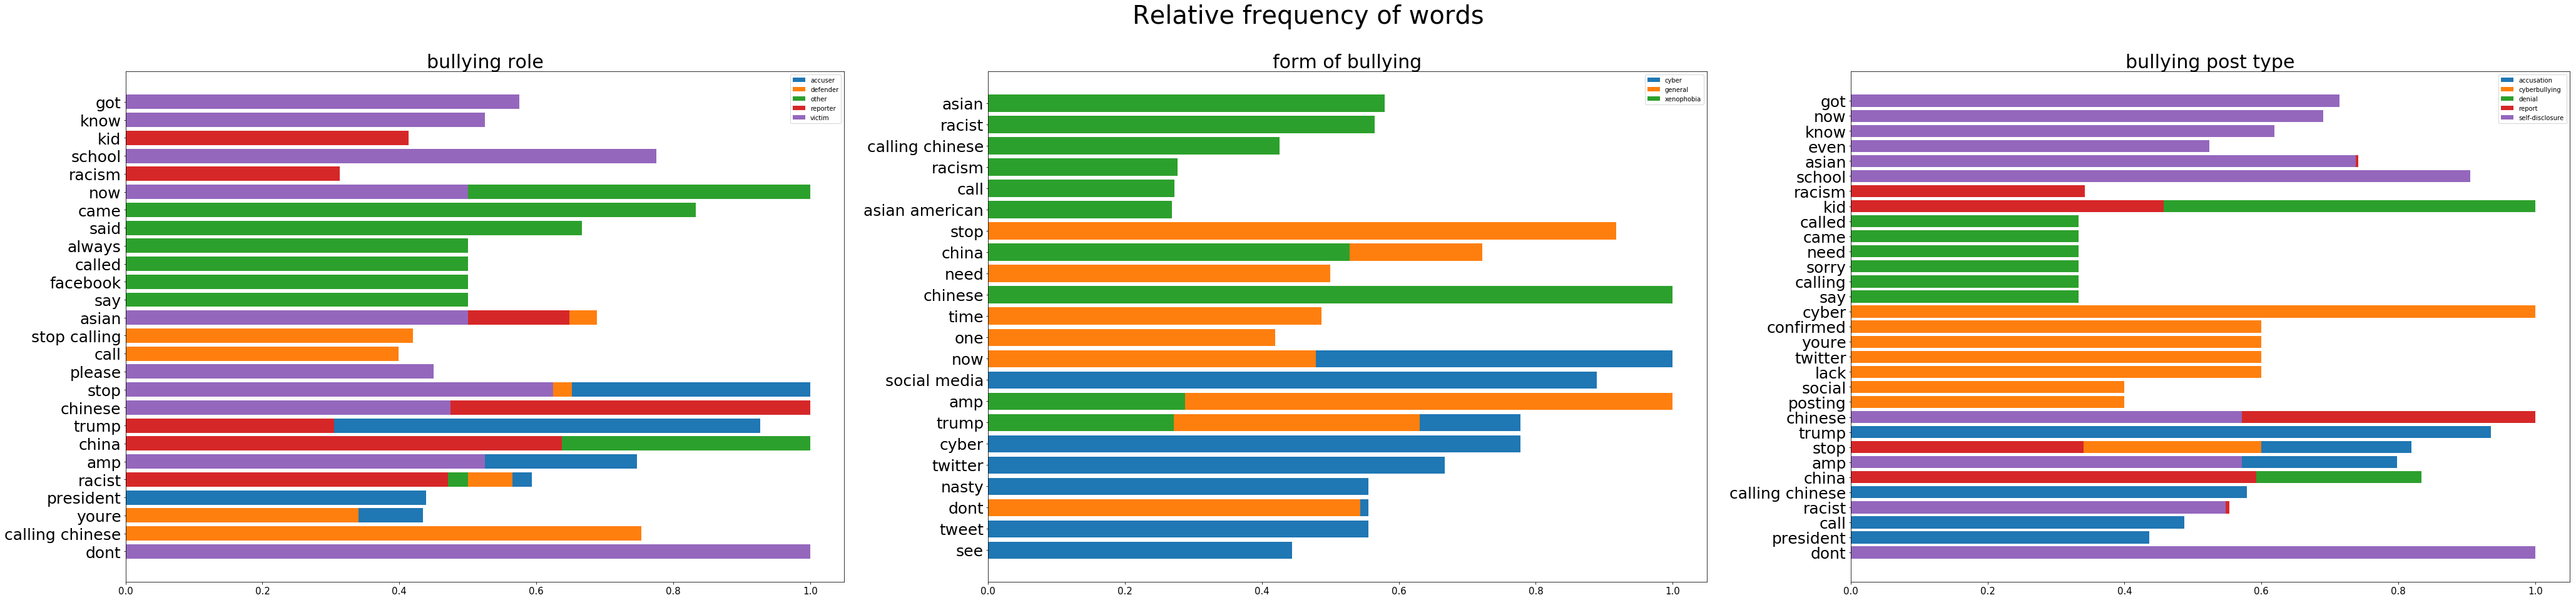

In [240]:
fig, axes = plt.subplots(1, 3,figsize=(70,15))
top_n = 10
for ax, target in zip(axes.ravel(), targets):
    freq = targets_freq[target]
    print(target)
    for j in freq:
        print('    ', j)
        x_val = [ x[0] for x in freq[j][1][:top_n] ][::-1]
        y_val = [ x[1] for x in freq[j][1][:top_n] ][::-1]
        ax.barh(x_val, y_val, linewidth =1, label=j, )
        ax.tick_params(axis="y", labelsize=25)
        ax.tick_params(axis="x", labelsize=15)
        ax.set_title(re.sub('_',' ',target), fontsize=30)
        ax.legend(loc=1)
plt.suptitle('Relative frequency of words', fontsize=40)
plt.savefig(Path.joinpath(PLOTS,'all.pdf'))

       cyber
       general
       xenophobia


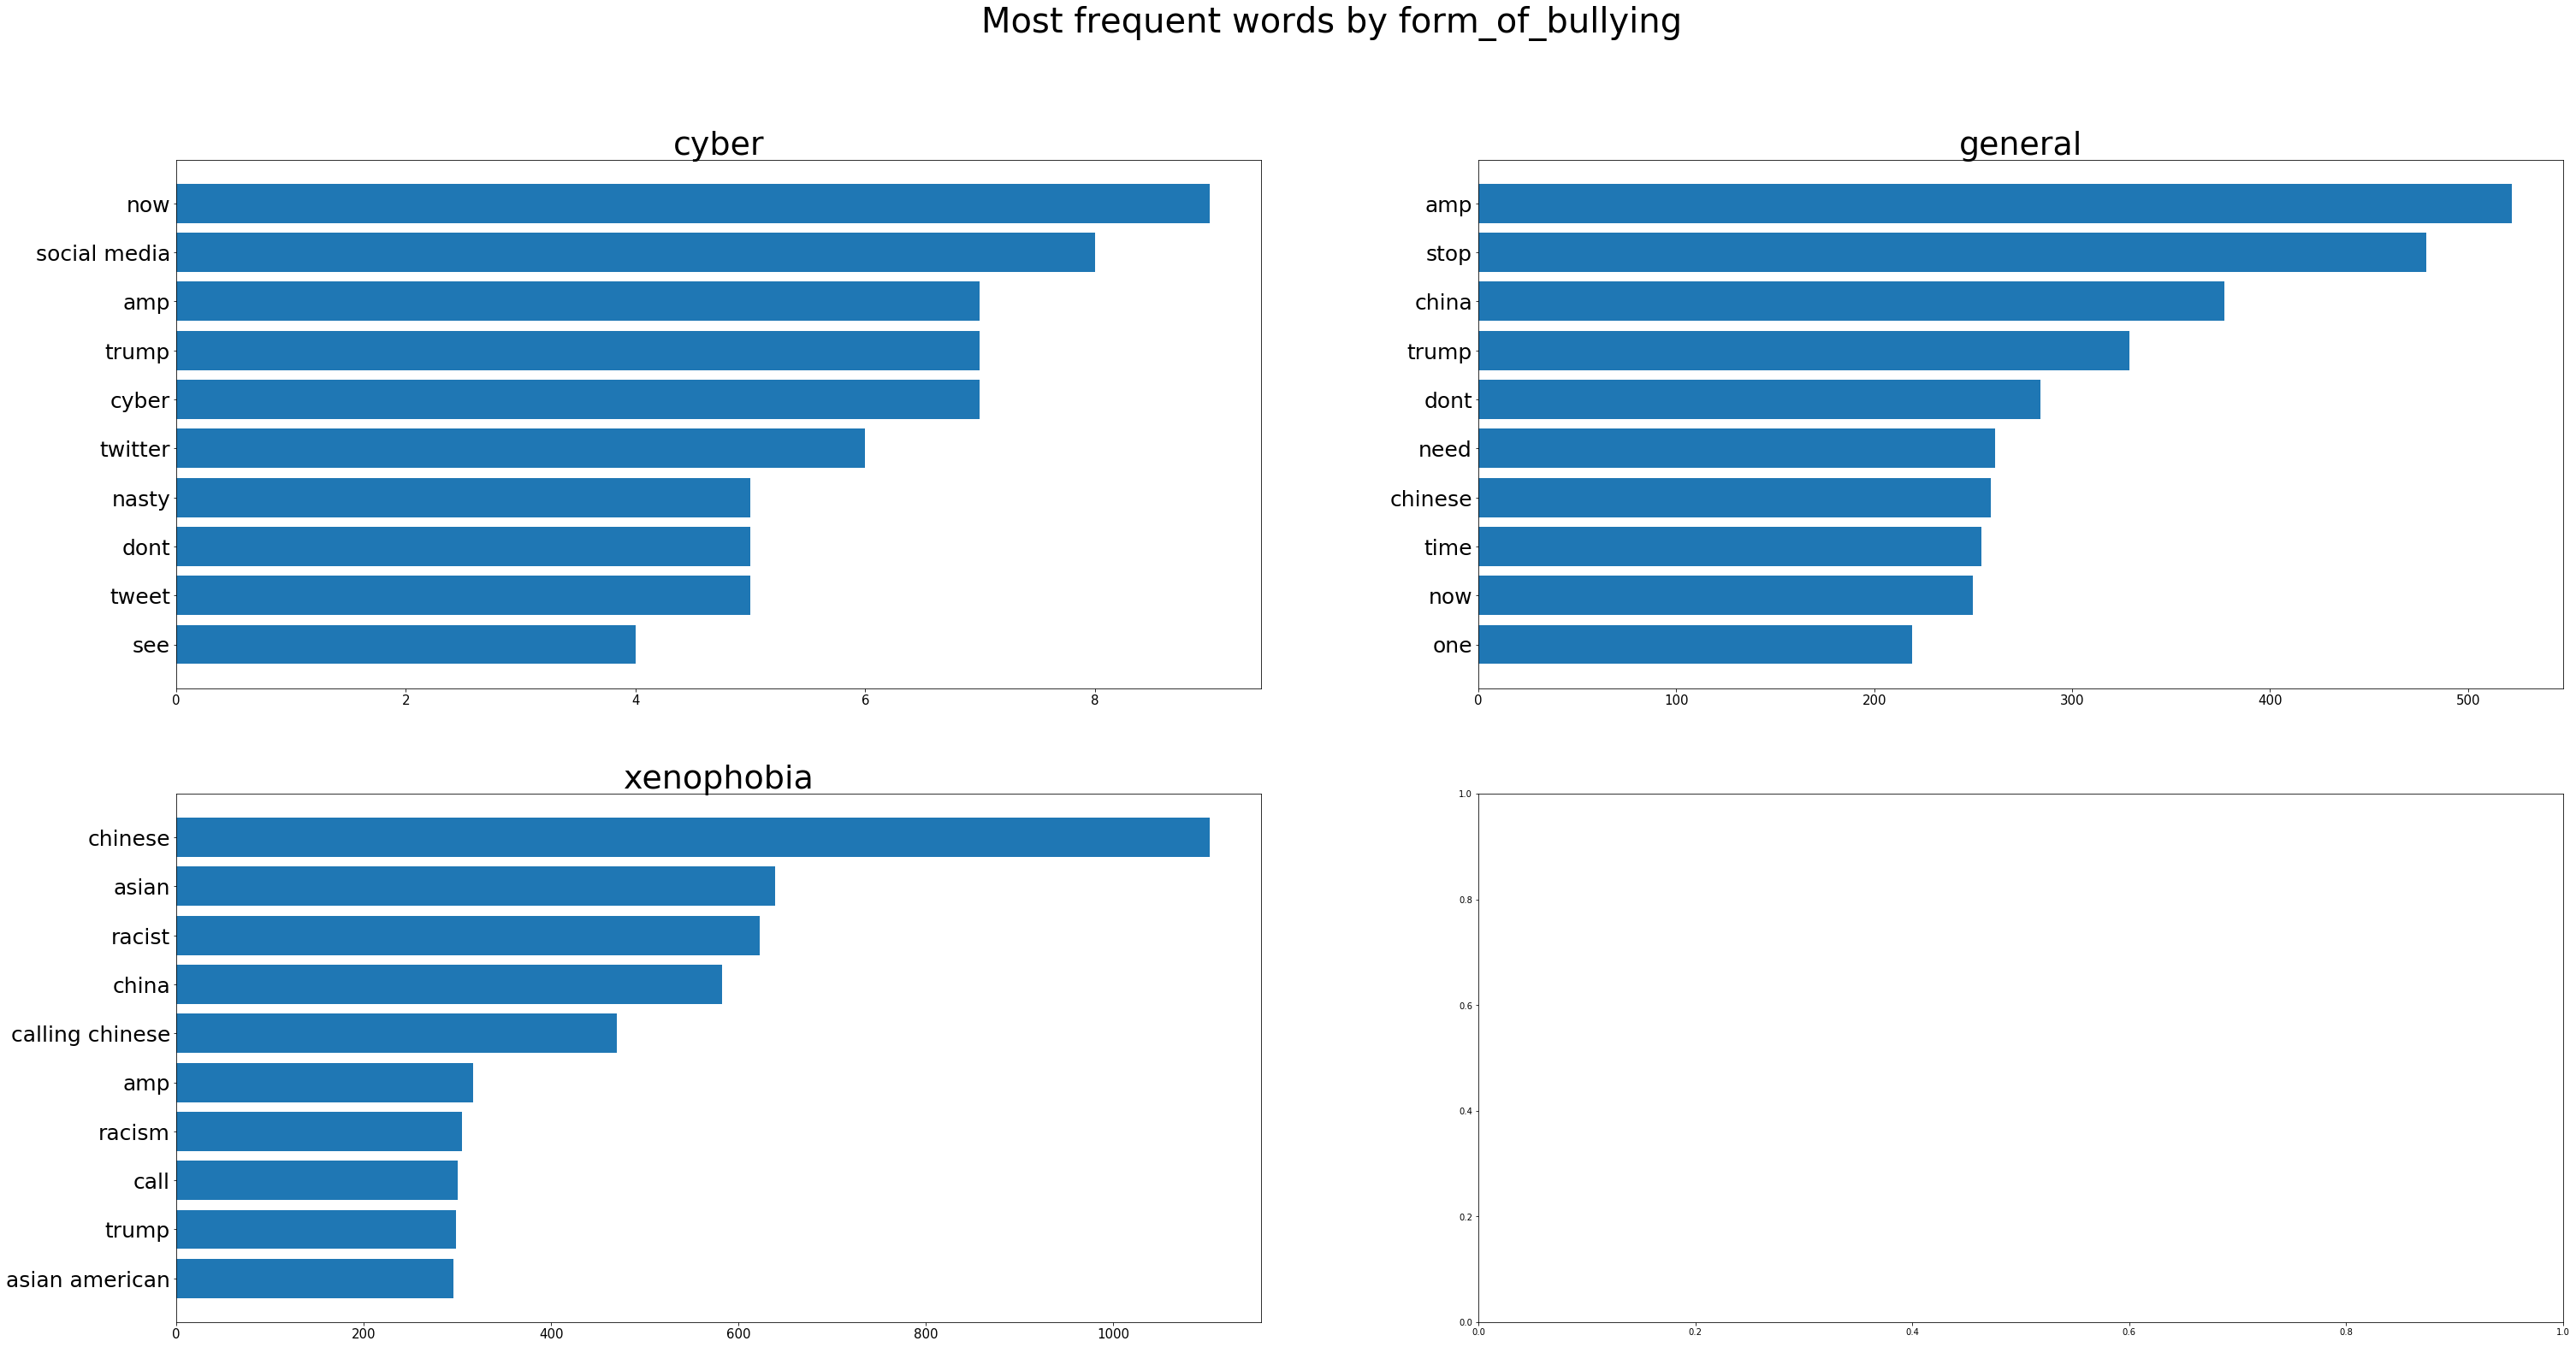

In [230]:
target = targets[1]
freq = targets_freq[target]
fig, axes = plt.subplots(2, int(len(freq.keys())/2), figsize=(50,25))
for ax, j in zip(axes.ravel(), freq):
    print('      ',j)
    x = [x[0] for x in freq[j][0][:top_n]][::-1]
    y = [x[1] for x in freq[j][0][:top_n]][::-1]
    ax.barh(x, y)
    ax.tick_params(axis="y", labelsize=25)
    ax.tick_params(axis="x", labelsize=15)
    ax.set_title(j, fontsize=38)
plt.suptitle('Most frequent words by ' + target, fontsize=40)
plt.savefig(Path.joinpath(PLOTS,target+'_indv.pdf'))

       accuser
       defender
       other
       reporter
       victim


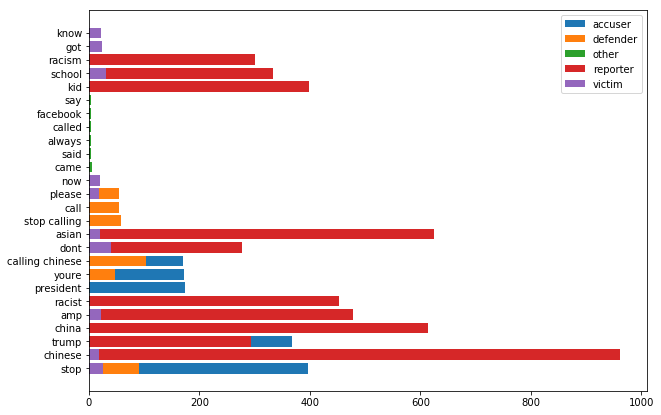

In [205]:
# target = targets[0]
# freq = targets_freq[target]
# fig, axes = plt.subplots(1, 1,figsize=(10,7))
# for j in freq:
#     print('      ',j)
#     x_val = [x[0] for x in freq[j][0][:top_n]]
#     y_val = [x[1] for x in freq[j][0][:top_n]]
#     plt.barh(x_val, y_val, linewidth = 2, label=j)
#     plt.legend(loc=1)
# plt.savefig(Path.joinpath(PLOTS,target+'.pdf'))


accuser
defender
other
reporter
victim


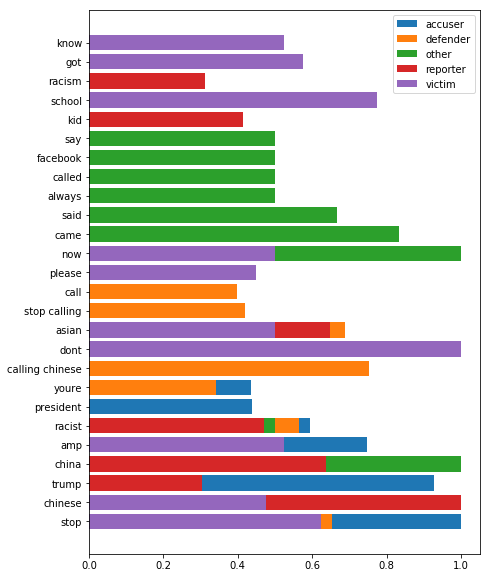

In [140]:
# fig, axes = plt.subplots(1, 1,figsize=(7,10))
# for i in freq:
#     print(i)
#     x_val = [x[0] for x in freq[i][1][:top_n]]
#     y_val = [x[1] for x in freq[i][1][:top_n]]
#     plt.barh(x_val, y_val, linewidth =1, label=i)
# #     plt.style.use('seaborn-white')
#     plt.legend(loc=1)
# plt.savefig(Path.joinpath(PLOTS,target+'.pdf'))


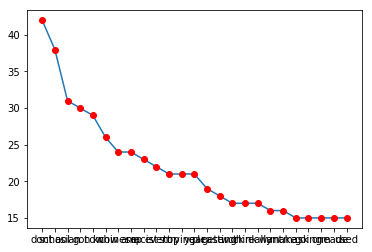

In [204]:
D = wc.process_text(clean_string)
word_freq = {k: v for k, v in sorted(D.items(),reverse=True, key=lambda item: item[1])}
relative_freq = wc.words_

#print results
word_freq = list(word_freq.items())
relative_freq = list(relative_freq.items())

n = 25
x_val = [x[0] for x in word_freq[:n]]
y_val = [x[1] for x in word_freq[:n]]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'or')
plt.show()


In [244]:
mask = np.array(Image.open('/Users/peaceforlives/Downloads/images.jpeg'))
wc = WordCloud(background_color="white", max_words=2000, mask=mask)
wc.generate(clean_string)

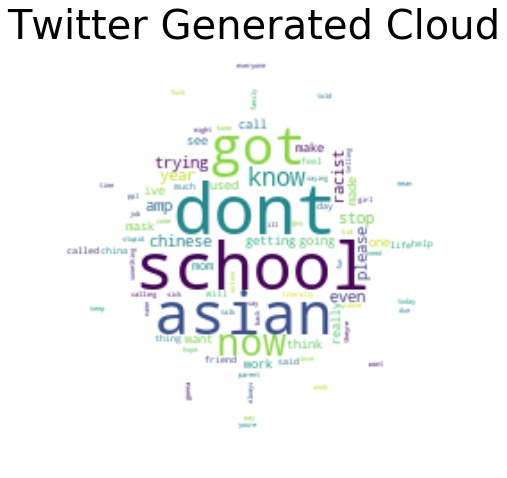

In [246]:
f = plt.figure(figsize=(7,10))
# f.add_subplot(1,2, 1)
# plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
# plt.title('Original Stencil', size=40)
# plt.axis("off")
# f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=40)
plt.axis("off")
plt.show()